Lista 4

Metodo de francis

In [84]:
import numpy as np
import scipy
import scipy.stats as scp

from scipy import linalg
import matplotlib.pylab as plt
from scipy.sparse import diags, linalg
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
import time

Questão 1


0.16578030586242676
0.23244762420654297
1.1624476909637451
24.155190229415894
111.15194654464722


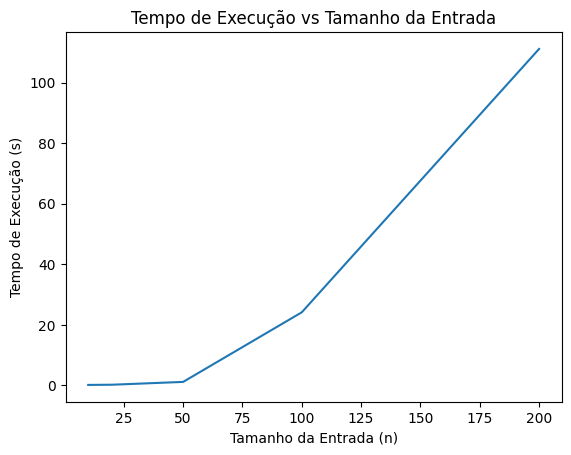

In [96]:
def met_Francis( A, max_iter, tol):
    tam = len(A)
    v=np.identity(tam)
    k = 1
    err =0.02
   
    maior_valor = A[0, 1]

    ''' mask = np.ones(A.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    err = abs(max(A[mask].min(), A[mask].max(), key=abs))
    print(maior_valor, err)'''
    while( k < max_iter and err > tol  ):   
        Q, R = scipy.linalg.qr(A) #retorna a fatoração QR da matriz A 

        for i in range(tam-1):  # Itera sobre as linhas
            for j in range(tam-1):  # Itera sobre as colunas
                if (i != j and abs(A[i, j]) > err):
                    err = abs(A[i, j]) 
        #err = abs(max(A[mask].min(), A[mask].max(), key=abs))

        v = v@(Q)
        A = R@(Q)    
        
        k+=1

    return  A, v, Q, R


n=[10,20,50,100,200]
tempo =[]

for i in n:
    m = np.random.randint(-20,20,size=(i,i))
    mtest = m @ np.transpose(m) # encontrando uma matriz simétrica
   
   
    ti = time.time()
    matriz, vetor, q, r =met_Francis(mtest, 10**3, 10**-4)#passando uma matriz randomica de nxn
    tf = time.time()-ti

    print(tf)
    tempo.append(tf)


plt.plot(n, tempo)
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução vs Tamanho da Entrada')
plt.show()

Questão 2


In [ ]:


import scipy.linalg


def  matriz_autovalores(autoval,  n):

    #criação de uma matriz diagonal de autovalores
    Diag = np.diag(autoval)
    print(f'matriz diagonal de autovalores: \n{Diag}')
    #uma matriz ortogonal de dimensão n
    MOrto = scp.ortho_group.rvs(n)
    print(f'Matriz Ortognal: \n{MOrto}')
    #encontrando A
    A = MOrto @ Diag @ np.linalg.inv(MOrto)
    
    return A
tam = 6 
autovalores = [1,2,3,4,5,6]

matriz = matriz_autovalores(autovalores, tam)
print('A matriz gerada é:\n ', np.round(matriz, 2))

#verificando 

valores,_ = scipy.linalg.eigh(matriz)
print(f'Autovalores: \n{valores}') 





matriz diagonal de autovalores: 
[[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]
Matriz Ortognal: 
[[-0.25660286  0.18413686  0.12894315 -0.73589242 -0.16896112 -0.55994352]
 [ 0.23890085  0.61678289  0.51878959  0.13148901 -0.49062178  0.18805188]
 [-0.35245997 -0.11014534 -0.14956671  0.57101395 -0.50914109 -0.50595276]
 [-0.64442099 -0.161563    0.66632111  0.12454887  0.2778253   0.14810756]
 [-0.0417725   0.63879325 -0.11180054  0.28910481  0.6044259  -0.35886852]
 [ 0.57950839 -0.37333772  0.48515734  0.12657826  0.1702944  -0.49435725]]
A matriz gerada é:
  [[ 4.37 -0.24  0.44 -0.74  0.05  1.05]
 [-0.24  3.11  0.53  0.23 -1.13 -0.48]
 [ 0.44  0.53  4.35 -0.91  0.14  1.02]
 [-0.74  0.23 -0.91  2.38  0.26  0.58]
 [ 0.05 -1.13  0.14  0.26  3.79  1.06]
 [ 1.05 -0.48  1.02  0.58  1.06  3.  ]]
Autovalores: 
[1. 2. 3. 4. 5. 6.]


Questão 5

In [ ]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen(N1, N2, sigma, rho, e, delta, r):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scipy.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')
    
    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scipy.sparse.identity(nunk, format='csr')
    
    # Lados verticais
    for k in range(0,N2):
        Ic = ij2n(0,k,N1) # Left
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(N1-1,k,N1) # Right
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        
    # Lados horizontais
    for k in range(0,N1):
        Ic = ij2n(k,0,N1) # Bottom
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(k,N2-1,N1) # Top
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scipy.sparse.identity(nunk, format='csr')
    for i in range(N1):
        for j in range(N2):
            Ic = ij2n(i,j,N1)
            M[Ic,Ic]=(1+0.75*np.cos(4*np.pi*xij)*np.cos(2*np.pi*yij))*e

    
    return K, M    

In [ ]:
# Tamanho da grade
N1 = 41
N2 = 21
L1 = 1.0
L2 = 0.5
# Distancia entre pontos: Cuidado que L1/(N1-1) seja igual a L2/(N2-1)
delta = L1 / (N1-1) 

# Tensão da membrana
sigma = 1.0
rho = 1
e = 1

# Aplicar restrições nas bordas
K, M = BuildMatrizesEigen(N1, N2, sigma, rho, e, delta)
#print(K.todense(), "\n\n", M.todense())
#plt.spy(K, markersize=0.75)

# Calcular modos de oscilação

# Método tipo Francis: Todos os autovalores e autovetores (não trabalha com esparsas)
#Lam, Q = linalg.eigh(K.todense(), M.todense())

# Método tipo potencias: Apenas os modos fundamentais (trabalha com esparsas!)
Lam, Q = scipy.sparse.linalg.eigsh(K, k=20, M=M, which='SM')

omegas = np.sqrt(Lam)
print(omegas)